<a href="https://colab.research.google.com/github/SKYUTS/MachineLearning-AI-/blob/main/Module4_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 50000  # Consider only the top 50,000 words from the dataset
maxlen = 500 # Truncate or pad sequences to this length
batch_size = 32  # Number of samples processed before the model is updated

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences
input_train shape: (25000,)
input_test shape: (25000,)


In [ ]:
print("Before padding:")
print("Length of the first training sequence: ", len(input_train[0]))
print("First training sequence: ", input_train[0])

Before padding:
Length of the first training sequence:  218
First training sequence:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 1

In [ ]:
# Decode the content to words
word_index = imdb.get_word_index()
def decode_review(review):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

decode_review(input_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

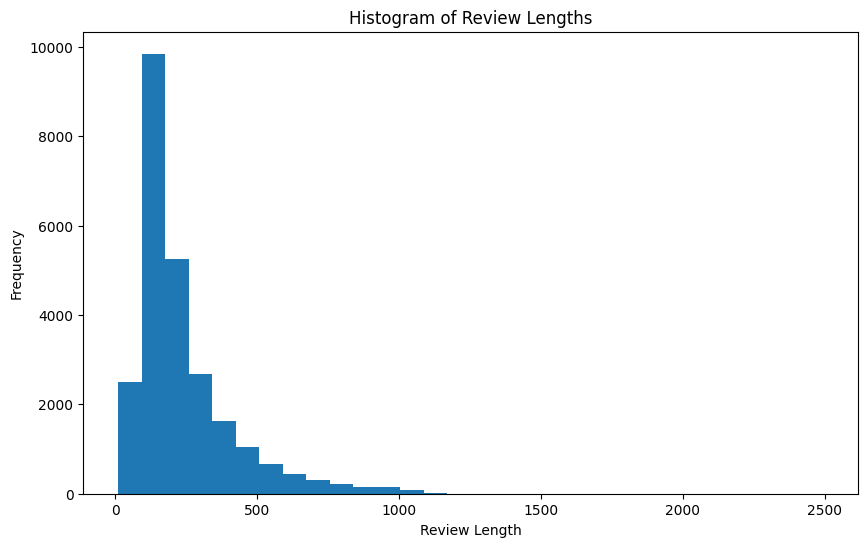

In [ ]:
import matplotlib.pyplot as plt

# Get lengths of the reviews
review_lengths = [len(review) for review in input_train]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Padding

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
# Print some sequences after padding
print("\nAfter padding:")
print("Length of the first training sequence: ", len(input_train[0]))
print("First training sequence: ", input_train[0])


After padding:
Length of the first training sequence:  500
First training sequence:  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  

In [ ]:
# Model building and training

from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM, Embedding, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=9,
batch_size=128,
validation_split=0.2)

Epoch 1/9
157/157 [==============================] - 30s 178ms/step - loss: 0.5941 - acc: 0.6702 - val_loss: 0.4036 - val_acc: 0.8358
Epoch 2/9
157/157 [==============================] - 23s 147ms/step - loss: 0.3440 - acc: 0.8609 - val_loss: 0.3428 - val_acc: 0.8600
Epoch 3/9
157/157 [==============================] - 22s 139ms/step - loss: 0.2502 - acc: 0.9049 - val_loss: 0.3505 - val_acc: 0.8552
Epoch 4/9
157/157 [==============================] - 18s 113ms/step - loss: 0.1988 - acc: 0.9262 - val_loss: 0.3416 - val_acc: 0.8612
Epoch 5/9
157/157 [==============================] - 21s 131ms/step - loss: 0.1625 - acc: 0.9411 - val_loss: 0.4317 - val_acc: 0.8668
Epoch 6/9
157/157 [==============================] - 14s 91ms/step - loss: 0.1286 - acc: 0.9556 - val_loss: 0.4245 - val_acc: 0.8394
Epoch 7/9
157/157 [==============================] - 11s 73ms/step - loss: 0.1070 - acc: 0.9640 - val_loss: 0.3582 - val_acc: 0.8788
Epoch 8/9
157/157 [==============================] - 10s 61ms/st

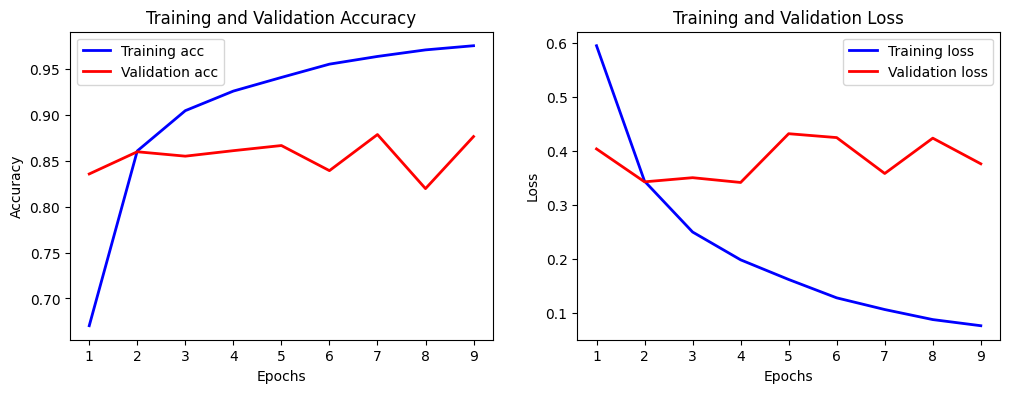

In [ ]:
# Visualise the training process
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(epochs, acc, 'b', label='Training acc', linewidth=2)
ax1.plot(epochs, val_acc, 'r', label='Validation acc', linewidth=2)
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss', linewidth=2)
ax2.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [ ]:
# Print the predictions for some reviews

import numpy as np

# Loop through the first 10 reviews
for i in range(10):
    # Convert the i-th review to a numpy array and expand its dimensions
    review = np.expand_dims(input_train[i], axis=0)

    # Get the prediction for the i-th review
    prediction = model.predict(review)[0][0]
    predicted_label = "positive" if prediction > 0.5 else "negative"

    # Get the actual label
    actual_label = "positive" if y_train[i] == 1 else "negative"

    # Print the original review, the predicted result, and the actual label
    print(f"Review {i+1}:")
    print(decode_review(input_train[i]))
    print("Predicted sentiment: ", predicted_label)
    print("Actual sentiment: ", actual_label)
    print("\n")

1/1 [==============================] - 0s 24ms/step
Review 1:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throug